# User Story 2
- User fills out the Blueprint with the PARAMS and executes several subfunctions of the experiment pipeline stepwise.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef and ElectricDevices.
- Sometimes the user is interested in visualizing the data before applying DCA. Some performance metrics are visualized

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
import sys

#sys.path.append(os.path.abspath("src"))
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M


[2025-05-06 11:56:45] INFO - Custom-named logger active.
[2025-05-06 11:56:45] INFO - Custom-named logger active.


In [82]:
configs = load_and_expand_yaml(path="experiment.yaml")
configs[0]

[2025-04-17 16:56:27] INFO - Loading and expanding YAML configuration from: experiment.yaml
[2025-04-17 16:56:27] INFO - YAML configuration expanded into 3 configurations


{'DATASET_NAME': 'ElectricDevices',
 'CLASSIFIER_NAME': 'MR-Hydra',
 'REDUCTION_F': 10,
 'RANDOM_S': 0,
 'DCA': {'type': 'LabelErrors',
  'DoE_param': {'le_strategy': 'leV1',
   'p_vec': 'None',
   'random_seed': 0,
   'start': 0,
   'stop': 100,
   'step': 5}}}

In [ ]:
def percentage_to_instance_converter(doe_param, train_test_df):
    doe_param = doe_param.copy()
    try:
        instances_no = train_test_df["y_train_small"].shape[0]
    except:
        instances_no = len(train_test_df["y_train_small"])

    # for start=0
    percentage_start = doe_param["start"]
    percentage_stop = doe_param["stop"]
    percentage_step = doe_param["step"]
    no_perc_steps = int(percentage_stop/percentage_step) #should be integer because 2 --> 29 should be invalid 
    
    instances_step = int(np.round(instances_no * percentage_step/100))
    max_steps = int(instances_no/instances_step)
    if not no_perc_steps <= max_steps:
        no_perc_steps = max_steps
        print("Cap reached")


    instances_stop = instances_step*no_perc_steps # up until near 99% of data
    doe_param["stop"]=instances_stop
    doe_param["step"]=instances_step

    return doe_param

In [72]:
new_doe = percentage_to_instance_converter(doe_param=doe_param, train_test_df=train_test_dff)


In [17]:
DATASET_NAME = "Beef"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                        #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","p_vec":None, "random_seed":5,"start":0,"stop":70,"step":2} #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True                                           #Define if results should be saved

In [18]:
# Classifier MR-Hydra, Dataset Beef 100%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
#x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = BakeoffClassifier(name= CLASSIFIER_NAME, random_state=RANDOM_S)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_, trace_M_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

[2025-04-27 12:12:08] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-04-27 12:12:08] INFO - requested_instance_step = 0.6 will be transformed into 1
[2025-04-27 12:12:08] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-04-27 12:12:08] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-04-27 12:12:08] INFO - The p_vector for the current_experiment: [0.2, 0.2, 0.2, 0.2, 0.2]
[2025-04-27 12:12:08] INFO - Searching inside simulation_results/MR-Hydra/Beef for results
[2025-04-27 12:12:08] INFO - 📁 Found directories: ['leV1_1_0_20_1', 'leV1_1_0_24_1', 'leV1_0_0_20_2', 'leV1_2_0_20_5', 'leV1_2_0_20_2', 'leV1_0_0_6_1', 'leV1_5_0_6_1', 'leV1_5_0_15_1', 'leV1_1_0_12_1', 'leV1_5_0_3_1', 'leV1_0_0_22_2', 'leV1_3_0_10_1', 'leV1_1_0_10_1', 'leV1_3_0_4_1']
[2025-04-27 12:12:08] INFO - 🟡 Partial Match found: leV1_5_0_6_1
[2025-04-27 12:12:08] INFO - 🟡 Partial Match found: leV1_5_0_15_1
[2025-04-27 12:12:08] INFO - 🟡 Partial Match found: leV1_5_0_3_1
[2025-04-27 

X_train             : (30, 1, 470)
y_train             : (30,)
X_test              : (30, 1, 470)
y_test              : (30,)
X_train_small       : (30, 1, 470)
y_train_small       : (30,)
X_test_small        : (30, 1, 470)
y_test_small        : (30,)
['1' '5' '5' '1' '1' '1' '5' '2' '5' '3' '4' '2' '5' '5' '4' '1' '2' '4'
 '4' '3' '4' '4' '4' '4' '4' '5' '5' '1' '5' '3']
type: 
<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5']
type:
<class 'numpy.ndarray'>
Classifier: BakeoffClassifier


[2025-04-27 12:12:10] INFO - ------------------------Train time=0.87s, Eval Time=1.46s
[2025-04-27 12:12:10] INFO - current iteration: 16   current LE_step: 16 error_relative: 0.5328
[2025-04-27 12:12:10] INFO - changed label 2 to 4 at index 11 of the data
[2025-04-27 12:12:10] INFO - current class balance distribution: {'1': 6, '2': 6, '3': 6, '4': 6, '5': 6}



Algorithm                         Accuracy
MR-Hydra                          0.4667
['1' '5' '5' '1' '1' '1' '5' '2' '5' '3' '4' '4' '5' '5' '4' '1' '2' '4'
 '4' '3' '4' '4' '4' '4' '4' '5' '5' '1' '5' '3']
type: 
<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5']
type:
<class 'numpy.ndarray'>
Classifier: BakeoffClassifier


[2025-04-27 12:12:13] INFO - ------------------------Train time=0.89s, Eval Time=1.49s
[2025-04-27 12:12:13] INFO - current iteration: 17   current LE_step: 17 error_relative: 0.5661
[2025-04-27 12:12:13] INFO - changed label 1 to 5 at index 4 of the data
[2025-04-27 12:12:13] INFO - current class balance distribution: {'1': 6, '2': 6, '3': 6, '4': 6, '5': 6}



Algorithm                         Accuracy
MR-Hydra                          0.4333
['1' '5' '5' '1' '5' '1' '5' '2' '5' '3' '4' '4' '5' '5' '4' '1' '2' '4'
 '4' '3' '4' '4' '4' '4' '4' '5' '5' '1' '5' '3']
type: 
<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5']
type:
<class 'numpy.ndarray'>
Classifier: BakeoffClassifier


[2025-04-27 12:12:15] INFO - ------------------------Train time=0.93s, Eval Time=1.52s
[2025-04-27 12:12:15] INFO - current iteration: 18   current LE_step: 18 error_relative: 0.5994
[2025-04-27 12:12:15] INFO - changed label 5 to 2 at index 25 of the data
[2025-04-27 12:12:15] INFO - current class balance distribution: {'1': 6, '2': 6, '3': 6, '4': 6, '5': 6}



Algorithm                         Accuracy
MR-Hydra                          0.4333
['1' '5' '5' '1' '5' '1' '5' '2' '5' '3' '4' '4' '5' '5' '4' '1' '2' '4'
 '4' '3' '4' '4' '4' '4' '4' '2' '5' '1' '5' '3']
type: 
<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5']
type:
<class 'numpy.ndarray'>
Classifier: BakeoffClassifier


[2025-04-27 12:12:18] INFO - ------------------------Train time=0.94s, Eval Time=1.53s
[2025-04-27 12:12:18] INFO - current iteration: 19   current LE_step: 19 error_relative: 0.6327
[2025-04-27 12:12:18] INFO - changed label 5 to 3 at index 28 of the data
[2025-04-27 12:12:18] INFO - current class balance distribution: {'1': 6, '2': 6, '3': 6, '4': 6, '5': 6}



Algorithm                         Accuracy
MR-Hydra                          0.3667
['1' '5' '5' '1' '5' '1' '5' '2' '5' '3' '4' '4' '5' '5' '4' '1' '2' '4'
 '4' '3' '4' '4' '4' '4' '4' '2' '5' '1' '3' '3']
type: 
<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5']
type:
<class 'numpy.ndarray'>
Classifier: BakeoffClassifier


[2025-04-27 12:12:20] INFO - ------------------------Train time=0.93s, Eval Time=1.48s
[2025-04-27 12:12:20] INFO - current iteration: 20   current LE_step: 20 error_relative: 0.666
[2025-04-27 12:12:20] INFO - changed label 1 to 4 at index 0 of the data
[2025-04-27 12:12:20] INFO - current class balance distribution: {'1': 6, '2': 6, '3': 6, '4': 6, '5': 6}



Algorithm                         Accuracy
MR-Hydra                          0.3333
['4' '5' '5' '1' '5' '1' '5' '2' '5' '3' '4' '4' '5' '5' '4' '1' '2' '4'
 '4' '3' '4' '4' '4' '4' '4' '2' '5' '1' '3' '3']
type: 
<class 'numpy.ndarray'>
['1' '1' '1' '1' '1' '1' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '4' '4' '4' '4' '4' '4' '5' '5' '5' '5' '5' '5']
type:
<class 'numpy.ndarray'>
Classifier: BakeoffClassifier


[2025-04-27 12:12:22] INFO - ------------------------Train time=0.93s, Eval Time=1.55s
[2025-04-27 12:12:22] INFO - current iteration: 21   current LE_step: 21 error_relative: 0.6993



Algorithm                         Accuracy
MR-Hydra                          0.3333
✅ Results saved in: simulation_results/MR-Hydra/Beef/leV1_5_0_21_1


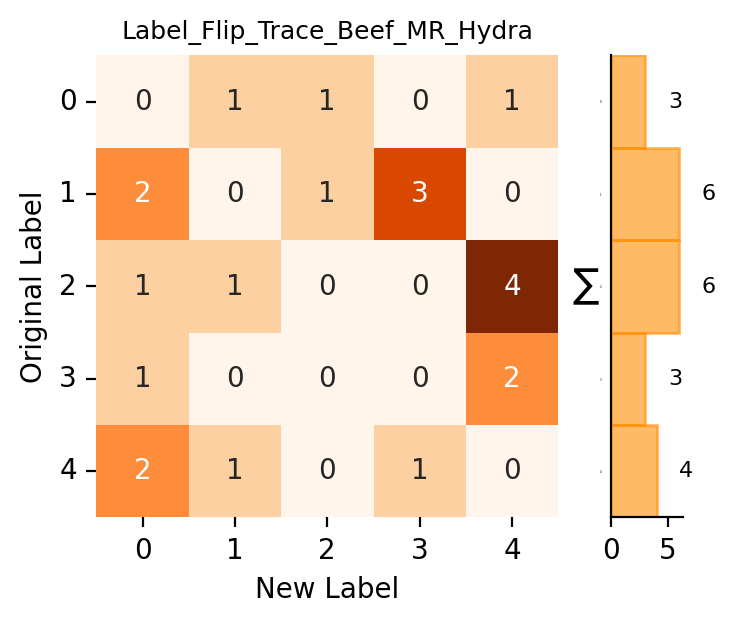

In [5]:
visualize_trace_M(trace_M_, cl_="MR_Hydra", ds_="Beef")

In [6]:
df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.0000,0.7667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,1,2,0.0666,0.7333,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 5, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
2,2,4,0.1332,0.6667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 5, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
3,3,6,0.1998,0.6667,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 5, 3, 5, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 3, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,4,8,0.2664,0.6667,"[1, 1, 1, 1, 5, 1, 2, 2, 2, 2, 2, 1, 5, 5, 5, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 5, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
5,5,10,0.3330,0.7333,"[1, 1, 1, 1, 5, 1, 2, 2, 3, 2, 2, 1, 5, 5, 5, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 5, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
6,6,12,0.3996,0.6000,"[1, 1, 1, 1, 5, 1, 4, 2, 3, 2, 2, 1, 5, 5, 5, ...","[4, 1, 1, 1, 1, 1, 4, 2, 5, 1, 2, 1, 4, 5, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
7,7,14,0.4662,0.6000,"[1, 1, 1, 1, 5, 1, 4, 2, 3, 2, 2, 1, 5, 5, 5, ...","[4, 1, 1, 1, 1, 1, 4, 2, 4, 1, 2, 1, 4, 5, 4, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
8,8,16,0.5328,0.5333,"[1, 1, 1, 1, 5, 1, 4, 4, 3, 2, 1, 1, 5, 5, 5, ...","[4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 4, 1, 4, 5, 4, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
9,9,18,0.5994,0.4333,"[1, 1, 2, 1, 5, 1, 4, 4, 3, 2, 1, 1, 5, 5, 5, ...","[4, 1, 1, 2, 1, 1, 4, 4, 4, 1, 4, 1, 4, 5, 5, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."


In [7]:
DATASET_NAME = "ElectricDevices"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"                       #should be in cl_ names
REDUCTION_F = 10                                   #optional. only for large datasets
RANDOM_S = 0                        #Random Seed for everything except the DCA
DCA= "LabelErrors"                      
DoE_PARAM = {"le_strategy": "leV1", "p_vec":None, "random_seed":1,"start":0,"stop":500,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                              #respect folder structure
SAVE_FILES = True 

[2025-04-17 10:47:25] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-04-17 10:47:25] INFO - label_names: ['1' '2' '3' '4' '5' '6' '7']
[2025-04-17 10:47:25] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-04-17 10:47:25] INFO - The p_vector for the current_experiment: [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429]
[2025-04-17 10:47:25] INFO - Searching inside simulation_results/MR-Hydra/ElectricDevices for results
[2025-04-17 10:47:25] INFO - 📁 Found directories: ['leV1_1_0_250_5']
[2025-04-17 10:47:25] INFO - 🟡 Partial Match found: leV1_1_0_250_5
[2025-04-17 10:47:25] INFO - Succesfully loaded closest_file with same stepsize
[2025-04-17 10:47:25] INFO - Continuing from 250 to 500 with step 5.
[2025-04-17 10:47:25] INFO - changed label 1 to 7 at index 334 of the data
[2025-04-17 10:47:25] INFO - changed label 3 to 5 at index 670 of the data
[2025-04-17 10:47:25] INFO - changed label 3 to 6 at index 8 of the data
[2025-04-17 10:47:25]

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
Classifier: BakeoffClassifier


[2025-04-17 10:47:39] INFO - ------------------------Train time=5.79s, Eval Time=7.90s
[2025-04-17 10:47:39] INFO - current iteration: 51   current LE_step: 255 error_relative: 0.2805
[2025-04-17 10:47:39] INFO - changed label 4 to 5 at index 792 of the data
[2025-04-17 10:47:39] INFO - changed label 1 to 7 at index 54 of the data
[2025-04-17 10:47:39] INFO - changed label 1 to 2 at index 27 of the data
[2025-04-17 10:47:39] INFO - changed label 4 to 1 at index 200 of the data
[2025-04-17 10:47:39] INFO - changed label 2 to 3 at index 299 of the data
[2025-04-17 10:47:39] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5927
Classifier: BakeoffClassifier


[2025-04-17 10:47:52] INFO - ------------------------Train time=5.72s, Eval Time=8.18s
[2025-04-17 10:47:52] INFO - current iteration: 52   current LE_step: 260 error_relative: 0.286
[2025-04-17 10:47:52] INFO - changed label 2 to 6 at index 310 of the data
[2025-04-17 10:47:52] INFO - changed label 3 to 7 at index 394 of the data
[2025-04-17 10:47:52] INFO - changed label 1 to 6 at index 97 of the data
[2025-04-17 10:47:52] INFO - changed label 7 to 2 at index 574 of the data
[2025-04-17 10:47:52] INFO - changed label 4 to 3 at index 183 of the data
[2025-04-17 10:47:52] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5824
Classifier: BakeoffClassifier


[2025-04-17 10:48:06] INFO - ------------------------Train time=5.64s, Eval Time=7.85s
[2025-04-17 10:48:06] INFO - current iteration: 53   current LE_step: 265 error_relative: 0.2915
[2025-04-17 10:48:06] INFO - changed label 3 to 6 at index 887 of the data
[2025-04-17 10:48:06] INFO - changed label 2 to 7 at index 584 of the data
[2025-04-17 10:48:06] INFO - changed label 2 to 4 at index 112 of the data
[2025-04-17 10:48:06] INFO - changed label 3 to 6 at index 284 of the data
[2025-04-17 10:48:06] INFO - changed label 1 to 5 at index 271 of the data
[2025-04-17 10:48:06] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5979
Classifier: BakeoffClassifier


[2025-04-17 10:48:20] INFO - ------------------------Train time=5.63s, Eval Time=8.04s
[2025-04-17 10:48:20] INFO - current iteration: 54   current LE_step: 270 error_relative: 0.297
[2025-04-17 10:48:20] INFO - changed label 1 to 6 at index 517 of the data
[2025-04-17 10:48:20] INFO - changed label 4 to 3 at index 692 of the data
[2025-04-17 10:48:20] INFO - changed label 4 to 6 at index 755 of the data
[2025-04-17 10:48:20] INFO - changed label 7 to 6 at index 298 of the data
[2025-04-17 10:48:20] INFO - changed label 1 to 4 at index 48 of the data
[2025-04-17 10:48:20] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5927
Classifier: BakeoffClassifier


[2025-04-17 10:48:33] INFO - ------------------------Train time=5.72s, Eval Time=8.08s
[2025-04-17 10:48:33] INFO - current iteration: 55   current LE_step: 275 error_relative: 0.3025
[2025-04-17 10:48:33] INFO - changed label 5 to 6 at index 630 of the data
[2025-04-17 10:48:33] INFO - changed label 4 to 2 at index 840 of the data
[2025-04-17 10:48:33] INFO - changed label 2 to 3 at index 764 of the data
[2025-04-17 10:48:33] INFO - changed label 6 to 1 at index 148 of the data
[2025-04-17 10:48:33] INFO - changed label 1 to 7 at index 380 of the data
[2025-04-17 10:48:33] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5888
Classifier: BakeoffClassifier


[2025-04-17 10:48:47] INFO - ------------------------Train time=5.67s, Eval Time=7.98s
[2025-04-17 10:48:47] INFO - current iteration: 56   current LE_step: 280 error_relative: 0.308
[2025-04-17 10:48:47] INFO - changed label 3 to 2 at index 663 of the data
[2025-04-17 10:48:47] INFO - changed label 6 to 2 at index 581 of the data
[2025-04-17 10:48:47] INFO - changed label 5 to 7 at index 529 of the data
[2025-04-17 10:48:47] INFO - changed label 3 to 2 at index 483 of the data
[2025-04-17 10:48:47] INFO - changed label 5 to 2 at index 434 of the data
[2025-04-17 10:48:47] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5901
Classifier: BakeoffClassifier


[2025-04-17 10:49:01] INFO - ------------------------Train time=5.65s, Eval Time=7.96s
[2025-04-17 10:49:01] INFO - current iteration: 57   current LE_step: 285 error_relative: 0.3135
[2025-04-17 10:49:01] INFO - changed label 6 to 1 at index 364 of the data
[2025-04-17 10:49:01] INFO - changed label 2 to 6 at index 850 of the data
[2025-04-17 10:49:01] INFO - changed label 1 to 3 at index 788 of the data
[2025-04-17 10:49:01] INFO - changed label 5 to 1 at index 604 of the data
[2025-04-17 10:49:01] INFO - changed label 1 to 2 at index 846 of the data
[2025-04-17 10:49:01] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5863
Classifier: BakeoffClassifier


[2025-04-17 10:49:14] INFO - ------------------------Train time=5.72s, Eval Time=7.89s
[2025-04-17 10:49:14] INFO - current iteration: 58   current LE_step: 290 error_relative: 0.319
[2025-04-17 10:49:14] INFO - changed label 1 to 7 at index 368 of the data
[2025-04-17 10:49:14] INFO - changed label 6 to 4 at index 379 of the data
[2025-04-17 10:49:14] INFO - changed label 2 to 4 at index 468 of the data
[2025-04-17 10:49:14] INFO - changed label 4 to 2 at index 558 of the data
[2025-04-17 10:49:14] INFO - changed label 7 to 1 at index 276 of the data
[2025-04-17 10:49:14] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5863
Classifier: BakeoffClassifier


[2025-04-17 10:49:28] INFO - ------------------------Train time=5.99s, Eval Time=7.95s
[2025-04-17 10:49:28] INFO - current iteration: 59   current LE_step: 295 error_relative: 0.3245
[2025-04-17 10:49:28] INFO - changed label 7 to 4 at index 351 of the data
[2025-04-17 10:49:28] INFO - changed label 1 to 7 at index 163 of the data
[2025-04-17 10:49:28] INFO - changed label 3 to 2 at index 879 of the data
[2025-04-17 10:49:28] INFO - changed label 2 to 3 at index 301 of the data
[2025-04-17 10:49:28] INFO - changed label 5 to 4 at index 358 of the data
[2025-04-17 10:49:28] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5837
Classifier: BakeoffClassifier


[2025-04-17 10:49:42] INFO - ------------------------Train time=5.74s, Eval Time=8.00s
[2025-04-17 10:49:42] INFO - current iteration: 60   current LE_step: 300 error_relative: 0.33
[2025-04-17 10:49:42] INFO - changed label 6 to 5 at index 270 of the data
[2025-04-17 10:49:42] INFO - changed label 6 to 1 at index 544 of the data
[2025-04-17 10:49:42] INFO - changed label 2 to 3 at index 61 of the data
[2025-04-17 10:49:42] INFO - changed label 2 to 5 at index 605 of the data
[2025-04-17 10:49:42] INFO - changed label 5 to 6 at index 336 of the data
[2025-04-17 10:49:42] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5837
Classifier: BakeoffClassifier


[2025-04-17 10:49:56] INFO - ------------------------Train time=5.53s, Eval Time=7.88s
[2025-04-17 10:49:56] INFO - current iteration: 61   current LE_step: 305 error_relative: 0.3355
[2025-04-17 10:49:56] INFO - changed label 3 to 4 at index 57 of the data
[2025-04-17 10:49:56] INFO - changed label 7 to 5 at index 125 of the data
[2025-04-17 10:49:56] INFO - changed label 4 to 1 at index 726 of the data
[2025-04-17 10:49:56] INFO - changed label 3 to 7 at index 631 of the data
[2025-04-17 10:49:56] INFO - changed label 4 to 5 at index 711 of the data
[2025-04-17 10:49:56] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5785
Classifier: BakeoffClassifier


[2025-04-17 10:50:10] INFO - ------------------------Train time=6.14s, Eval Time=7.89s
[2025-04-17 10:50:10] INFO - current iteration: 62   current LE_step: 310 error_relative: 0.341
[2025-04-17 10:50:10] INFO - changed label 7 to 2 at index 859 of the data
[2025-04-17 10:50:10] INFO - changed label 5 to 3 at index 11 of the data
[2025-04-17 10:50:10] INFO - changed label 7 to 1 at index 64 of the data
[2025-04-17 10:50:10] INFO - changed label 4 to 6 at index 827 of the data
[2025-04-17 10:50:10] INFO - changed label 7 to 2 at index 139 of the data
[2025-04-17 10:50:10] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5759
Classifier: BakeoffClassifier


[2025-04-17 10:50:23] INFO - ------------------------Train time=5.60s, Eval Time=7.88s
[2025-04-17 10:50:23] INFO - current iteration: 63   current LE_step: 315 error_relative: 0.3465
[2025-04-17 10:50:23] INFO - changed label 4 to 3 at index 67 of the data
[2025-04-17 10:50:23] INFO - changed label 1 to 4 at index 684 of the data
[2025-04-17 10:50:23] INFO - changed label 5 to 2 at index 370 of the data
[2025-04-17 10:50:23] INFO - changed label 4 to 1 at index 586 of the data
[2025-04-17 10:50:23] INFO - changed label 1 to 3 at index 538 of the data
[2025-04-17 10:50:23] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5772
Classifier: BakeoffClassifier


[2025-04-17 10:50:37] INFO - ------------------------Train time=5.62s, Eval Time=8.00s
[2025-04-17 10:50:37] INFO - current iteration: 64   current LE_step: 320 error_relative: 0.352
[2025-04-17 10:50:37] INFO - changed label 2 to 5 at index 74 of the data
[2025-04-17 10:50:37] INFO - changed label 6 to 7 at index 844 of the data
[2025-04-17 10:50:37] INFO - changed label 4 to 6 at index 313 of the data
[2025-04-17 10:50:37] INFO - changed label 6 to 4 at index 264 of the data
[2025-04-17 10:50:37] INFO - changed label 2 to 7 at index 412 of the data
[2025-04-17 10:50:37] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5707
Classifier: BakeoffClassifier


[2025-04-17 10:50:50] INFO - ------------------------Train time=5.82s, Eval Time=7.95s
[2025-04-17 10:50:50] INFO - current iteration: 65   current LE_step: 325 error_relative: 0.3575
[2025-04-17 10:50:50] INFO - changed label 3 to 2 at index 860 of the data
[2025-04-17 10:50:50] INFO - changed label 5 to 4 at index 864 of the data
[2025-04-17 10:50:50] INFO - changed label 4 to 1 at index 696 of the data
[2025-04-17 10:50:50] INFO - changed label 7 to 1 at index 449 of the data
[2025-04-17 10:50:50] INFO - changed label 3 to 4 at index 414 of the data
[2025-04-17 10:50:50] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5837
Classifier: BakeoffClassifier


[2025-04-17 10:51:04] INFO - ------------------------Train time=5.66s, Eval Time=7.96s
[2025-04-17 10:51:04] INFO - current iteration: 66   current LE_step: 330 error_relative: 0.363
[2025-04-17 10:51:04] INFO - changed label 4 to 3 at index 115 of the data
[2025-04-17 10:51:04] INFO - changed label 4 to 2 at index 376 of the data
[2025-04-17 10:51:04] INFO - changed label 6 to 4 at index 16 of the data
[2025-04-17 10:51:04] INFO - changed label 5 to 6 at index 190 of the data
[2025-04-17 10:51:04] INFO - changed label 4 to 3 at index 759 of the data
[2025-04-17 10:51:04] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5824
Classifier: BakeoffClassifier


[2025-04-17 10:51:18] INFO - ------------------------Train time=5.70s, Eval Time=7.89s
[2025-04-17 10:51:18] INFO - current iteration: 67   current LE_step: 335 error_relative: 0.3685
[2025-04-17 10:51:18] INFO - changed label 2 to 1 at index 886 of the data
[2025-04-17 10:51:18] INFO - changed label 6 to 1 at index 180 of the data
[2025-04-17 10:51:18] INFO - changed label 3 to 2 at index 204 of the data
[2025-04-17 10:51:18] INFO - changed label 6 to 2 at index 95 of the data
[2025-04-17 10:51:18] INFO - changed label 1 to 7 at index 124 of the data
[2025-04-17 10:51:18] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5824
Classifier: BakeoffClassifier


[2025-04-17 10:51:32] INFO - ------------------------Train time=5.80s, Eval Time=8.01s
[2025-04-17 10:51:32] INFO - current iteration: 68   current LE_step: 340 error_relative: 0.374
[2025-04-17 10:51:32] INFO - changed label 4 to 5 at index 750 of the data
[2025-04-17 10:51:32] INFO - changed label 4 to 1 at index 70 of the data
[2025-04-17 10:51:32] INFO - changed label 4 to 1 at index 870 of the data
[2025-04-17 10:51:32] INFO - changed label 5 to 7 at index 465 of the data
[2025-04-17 10:51:32] INFO - changed label 2 to 7 at index 447 of the data
[2025-04-17 10:51:32] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5785
Classifier: BakeoffClassifier


[2025-04-17 10:51:45] INFO - ------------------------Train time=5.54s, Eval Time=7.83s
[2025-04-17 10:51:45] INFO - current iteration: 69   current LE_step: 345 error_relative: 0.3795
[2025-04-17 10:51:45] INFO - changed label 5 to 6 at index 678 of the data
[2025-04-17 10:51:45] INFO - changed label 5 to 7 at index 842 of the data
[2025-04-17 10:51:45] INFO - changed label 4 to 3 at index 286 of the data
[2025-04-17 10:51:45] INFO - changed label 7 to 5 at index 614 of the data
[2025-04-17 10:51:45] INFO - changed label 7 to 4 at index 667 of the data
[2025-04-17 10:51:45] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5616
Classifier: BakeoffClassifier


[2025-04-17 10:51:58] INFO - ------------------------Train time=5.64s, Eval Time=7.82s
[2025-04-17 10:51:58] INFO - current iteration: 70   current LE_step: 350 error_relative: 0.385
[2025-04-17 10:51:58] INFO - changed label 6 to 7 at index 51 of the data
[2025-04-17 10:51:58] INFO - changed label 6 to 4 at index 506 of the data
[2025-04-17 10:51:58] INFO - changed label 5 to 7 at index 282 of the data
[2025-04-17 10:51:58] INFO - changed label 5 to 1 at index 782 of the data
[2025-04-17 10:51:58] INFO - changed label 4 to 5 at index 309 of the data
[2025-04-17 10:51:58] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5629
Classifier: BakeoffClassifier


[2025-04-17 10:52:13] INFO - ------------------------Train time=6.23s, Eval Time=8.21s
[2025-04-17 10:52:13] INFO - current iteration: 71   current LE_step: 355 error_relative: 0.3905
[2025-04-17 10:52:13] INFO - changed label 7 to 5 at index 809 of the data
[2025-04-17 10:52:13] INFO - changed label 7 to 4 at index 98 of the data
[2025-04-17 10:52:13] INFO - changed label 1 to 6 at index 418 of the data
[2025-04-17 10:52:13] INFO - changed label 4 to 6 at index 37 of the data
[2025-04-17 10:52:13] INFO - changed label 7 to 6 at index 655 of the data
[2025-04-17 10:52:13] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5603
Classifier: BakeoffClassifier


[2025-04-17 10:52:26] INFO - ------------------------Train time=5.53s, Eval Time=7.80s
[2025-04-17 10:52:26] INFO - current iteration: 72   current LE_step: 360 error_relative: 0.396
[2025-04-17 10:52:26] INFO - changed label 3 to 6 at index 565 of the data
[2025-04-17 10:52:26] INFO - changed label 4 to 2 at index 235 of the data
[2025-04-17 10:52:26] INFO - changed label 5 to 1 at index 661 of the data
[2025-04-17 10:52:26] INFO - changed label 3 to 6 at index 416 of the data
[2025-04-17 10:52:26] INFO - changed label 1 to 4 at index 279 of the data
[2025-04-17 10:52:26] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5590
Classifier: BakeoffClassifier


[2025-04-17 10:52:40] INFO - ------------------------Train time=5.96s, Eval Time=8.02s
[2025-04-17 10:52:40] INFO - current iteration: 73   current LE_step: 365 error_relative: 0.4015
[2025-04-17 10:52:40] INFO - changed label 3 to 1 at index 704 of the data
[2025-04-17 10:52:40] INFO - changed label 2 to 7 at index 601 of the data
[2025-04-17 10:52:40] INFO - changed label 4 to 3 at index 388 of the data
[2025-04-17 10:52:40] INFO - changed label 1 to 6 at index 421 of the data
[2025-04-17 10:52:40] INFO - changed label 6 to 2 at index 464 of the data
[2025-04-17 10:52:40] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5499
Classifier: BakeoffClassifier


[2025-04-17 10:52:54] INFO - ------------------------Train time=5.62s, Eval Time=7.94s
[2025-04-17 10:52:54] INFO - current iteration: 74   current LE_step: 370 error_relative: 0.407
[2025-04-17 10:52:54] INFO - changed label 5 to 2 at index 269 of the data
[2025-04-17 10:52:54] INFO - changed label 5 to 1 at index 547 of the data
[2025-04-17 10:52:54] INFO - changed label 1 to 4 at index 519 of the data
[2025-04-17 10:52:54] INFO - changed label 1 to 6 at index 348 of the data
[2025-04-17 10:52:54] INFO - changed label 1 to 6 at index 40 of the data
[2025-04-17 10:52:54] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5499
Classifier: BakeoffClassifier


[2025-04-17 10:53:08] INFO - ------------------------Train time=5.52s, Eval Time=8.08s
[2025-04-17 10:53:08] INFO - current iteration: 75   current LE_step: 375 error_relative: 0.4125
[2025-04-17 10:53:08] INFO - changed label 1 to 2 at index 621 of the data
[2025-04-17 10:53:08] INFO - changed label 5 to 6 at index 550 of the data
[2025-04-17 10:53:08] INFO - changed label 1 to 3 at index 146 of the data
[2025-04-17 10:53:08] WARNING - Class 6 is now empty and will be removed from le_params!
[2025-04-17 10:53:08] INFO - changed label 6 to 5 at index 548 of the data
[2025-04-17 10:53:08] INFO - changed label 7 to 2 at index 84 of the data
[2025-04-17 10:53:08] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5383
Classifier: BakeoffClassifier


[2025-04-17 10:53:21] INFO - ------------------------Train time=5.87s, Eval Time=7.93s
[2025-04-17 10:53:21] INFO - current iteration: 76   current LE_step: 380 error_relative: 0.418
[2025-04-17 10:53:21] INFO - changed label 3 to 1 at index 749 of the data
[2025-04-17 10:53:21] INFO - changed label 3 to 4 at index 215 of the data
[2025-04-17 10:53:21] INFO - changed label 2 to 5 at index 444 of the data
[2025-04-17 10:53:21] INFO - changed label 1 to 3 at index 355 of the data
[2025-04-17 10:53:21] INFO - changed label 4 to 3 at index 327 of the data
[2025-04-17 10:53:21] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5383
Classifier: BakeoffClassifier


[2025-04-17 10:53:35] INFO - ------------------------Train time=5.54s, Eval Time=7.96s
[2025-04-17 10:53:35] INFO - current iteration: 77   current LE_step: 385 error_relative: 0.4235
[2025-04-17 10:53:35] INFO - changed label 1 to 6 at index 458 of the data
[2025-04-17 10:53:35] INFO - changed label 5 to 6 at index 829 of the data
[2025-04-17 10:53:35] INFO - changed label 7 to 3 at index 609 of the data
[2025-04-17 10:53:35] INFO - changed label 1 to 4 at index 505 of the data
[2025-04-17 10:53:35] INFO - changed label 1 to 2 at index 303 of the data
[2025-04-17 10:53:35] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5318
Classifier: BakeoffClassifier


[2025-04-17 10:53:48] INFO - ------------------------Train time=5.53s, Eval Time=7.84s
[2025-04-17 10:53:48] INFO - current iteration: 78   current LE_step: 390 error_relative: 0.429
[2025-04-17 10:53:48] INFO - changed label 3 to 2 at index 131 of the data
[2025-04-17 10:53:48] INFO - changed label 1 to 4 at index 407 of the data
[2025-04-17 10:53:48] INFO - changed label 5 to 3 at index 460 of the data
[2025-04-17 10:53:48] INFO - changed label 4 to 1 at index 608 of the data
[2025-04-17 10:53:48] INFO - changed label 4 to 7 at index 494 of the data
[2025-04-17 10:53:48] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5383
Classifier: BakeoffClassifier


[2025-04-17 10:54:02] INFO - ------------------------Train time=5.53s, Eval Time=7.84s
[2025-04-17 10:54:02] INFO - current iteration: 79   current LE_step: 395 error_relative: 0.4345
[2025-04-17 10:54:02] INFO - changed label 7 to 2 at index 65 of the data
[2025-04-17 10:54:02] INFO - changed label 4 to 3 at index 73 of the data
[2025-04-17 10:54:02] INFO - changed label 2 to 6 at index 0 of the data
[2025-04-17 10:54:02] INFO - changed label 2 to 1 at index 333 of the data
[2025-04-17 10:54:02] INFO - changed label 1 to 7 at index 82 of the data
[2025-04-17 10:54:02] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5305
Classifier: BakeoffClassifier


[2025-04-17 10:54:15] INFO - ------------------------Train time=5.69s, Eval Time=8.12s
[2025-04-17 10:54:15] INFO - current iteration: 80   current LE_step: 400 error_relative: 0.44
[2025-04-17 10:54:15] INFO - changed label 4 to 7 at index 349 of the data
[2025-04-17 10:54:15] INFO - changed label 7 to 2 at index 432 of the data
[2025-04-17 10:54:15] INFO - changed label 7 to 3 at index 225 of the data
[2025-04-17 10:54:16] INFO - changed label 2 to 3 at index 297 of the data
[2025-04-17 10:54:16] INFO - changed label 7 to 6 at index 542 of the data
[2025-04-17 10:54:16] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5279
Classifier: BakeoffClassifier


[2025-04-17 10:54:30] INFO - ------------------------Train time=5.96s, Eval Time=8.12s
[2025-04-17 10:54:30] INFO - current iteration: 81   current LE_step: 405 error_relative: 0.4455
[2025-04-17 10:54:30] INFO - changed label 3 to 6 at index 171 of the data
[2025-04-17 10:54:30] INFO - changed label 7 to 3 at index 140 of the data
[2025-04-17 10:54:30] INFO - changed label 3 to 1 at index 20 of the data
[2025-04-17 10:54:30] INFO - changed label 5 to 7 at index 626 of the data
[2025-04-17 10:54:30] INFO - changed label 1 to 2 at index 120 of the data
[2025-04-17 10:54:30] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5253
Classifier: BakeoffClassifier


[2025-04-17 10:54:44] INFO - ------------------------Train time=6.16s, Eval Time=7.99s
[2025-04-17 10:54:44] INFO - current iteration: 82   current LE_step: 410 error_relative: 0.451
[2025-04-17 10:54:44] INFO - changed label 1 to 3 at index 532 of the data
[2025-04-17 10:54:44] INFO - changed label 4 to 7 at index 855 of the data
[2025-04-17 10:54:44] INFO - changed label 1 to 2 at index 638 of the data
[2025-04-17 10:54:44] INFO - changed label 1 to 3 at index 66 of the data
[2025-04-17 10:54:44] INFO - changed label 5 to 4 at index 191 of the data
[2025-04-17 10:54:44] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5305
Classifier: BakeoffClassifier


[2025-04-17 10:54:58] INFO - ------------------------Train time=5.92s, Eval Time=7.98s
[2025-04-17 10:54:58] INFO - current iteration: 83   current LE_step: 415 error_relative: 0.4565
[2025-04-17 10:54:58] INFO - changed label 3 to 2 at index 369 of the data
[2025-04-17 10:54:58] INFO - changed label 2 to 3 at index 524 of the data
[2025-04-17 10:54:58] INFO - changed label 4 to 7 at index 463 of the data
[2025-04-17 10:54:58] INFO - changed label 5 to 6 at index 552 of the data
[2025-04-17 10:54:58] INFO - changed label 7 to 5 at index 498 of the data
[2025-04-17 10:54:58] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5292
Classifier: BakeoffClassifier


[2025-04-17 10:55:11] INFO - ------------------------Train time=5.58s, Eval Time=7.91s
[2025-04-17 10:55:11] INFO - current iteration: 84   current LE_step: 420 error_relative: 0.462
[2025-04-17 10:55:11] INFO - changed label 1 to 5 at index 768 of the data
[2025-04-17 10:55:11] INFO - changed label 1 to 7 at index 382 of the data
[2025-04-17 10:55:11] INFO - changed label 7 to 1 at index 555 of the data
[2025-04-17 10:55:11] INFO - changed label 7 to 4 at index 244 of the data
[2025-04-17 10:55:11] INFO - changed label 5 to 1 at index 81 of the data
[2025-04-17 10:55:11] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5266
Classifier: BakeoffClassifier


[2025-04-17 10:55:25] INFO - ------------------------Train time=5.62s, Eval Time=7.87s
[2025-04-17 10:55:25] INFO - current iteration: 85   current LE_step: 425 error_relative: 0.4675
[2025-04-17 10:55:25] INFO - changed label 4 to 5 at index 591 of the data
[2025-04-17 10:55:25] INFO - changed label 7 to 2 at index 839 of the data
[2025-04-17 10:55:25] INFO - changed label 4 to 3 at index 703 of the data
[2025-04-17 10:55:25] INFO - changed label 7 to 6 at index 610 of the data
[2025-04-17 10:55:25] INFO - changed label 2 to 7 at index 42 of the data
[2025-04-17 10:55:25] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5214
Classifier: BakeoffClassifier


[2025-04-17 10:55:38] INFO - ------------------------Train time=5.61s, Eval Time=7.91s
[2025-04-17 10:55:38] INFO - current iteration: 86   current LE_step: 430 error_relative: 0.473
[2025-04-17 10:55:38] INFO - changed label 5 to 6 at index 320 of the data
[2025-04-17 10:55:38] INFO - changed label 2 to 7 at index 62 of the data
[2025-04-17 10:55:38] INFO - changed label 1 to 2 at index 770 of the data
[2025-04-17 10:55:38] INFO - changed label 3 to 7 at index 705 of the data
[2025-04-17 10:55:38] INFO - changed label 1 to 2 at index 385 of the data
[2025-04-17 10:55:38] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5240
Classifier: BakeoffClassifier


[2025-04-17 10:55:52] INFO - ------------------------Train time=5.56s, Eval Time=7.88s
[2025-04-17 10:55:52] INFO - current iteration: 87   current LE_step: 435 error_relative: 0.4785
[2025-04-17 10:55:52] INFO - changed label 7 to 6 at index 1 of the data
[2025-04-17 10:55:52] INFO - changed label 3 to 5 at index 837 of the data
[2025-04-17 10:55:52] INFO - changed label 4 to 2 at index 806 of the data
[2025-04-17 10:55:52] INFO - changed label 5 to 2 at index 733 of the data
[2025-04-17 10:55:52] INFO - changed label 2 to 7 at index 644 of the data
[2025-04-17 10:55:52] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5175
Classifier: BakeoffClassifier


[2025-04-17 10:56:05] INFO - ------------------------Train time=5.65s, Eval Time=8.02s
[2025-04-17 10:56:05] INFO - current iteration: 88   current LE_step: 440 error_relative: 0.484
[2025-04-17 10:56:05] INFO - changed label 1 to 2 at index 300 of the data
[2025-04-17 10:56:05] INFO - changed label 3 to 7 at index 10 of the data
[2025-04-17 10:56:05] INFO - changed label 5 to 1 at index 802 of the data
[2025-04-17 10:56:05] WARNING - Class 7 is now empty and will be removed from le_params!
[2025-04-17 10:56:05] INFO - changed label 7 to 5 at index 862 of the data
[2025-04-17 10:56:05] INFO - changed label 2 to 4 at index 545 of the data
[2025-04-17 10:56:05] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5084
Classifier: BakeoffClassifier


[2025-04-17 10:56:19] INFO - ------------------------Train time=5.61s, Eval Time=7.88s
[2025-04-17 10:56:19] INFO - current iteration: 89   current LE_step: 445 error_relative: 0.4895
[2025-04-17 10:56:19] INFO - changed label 2 to 7 at index 361 of the data
[2025-04-17 10:56:19] INFO - changed label 1 to 5 at index 75 of the data
[2025-04-17 10:56:19] INFO - changed label 5 to 6 at index 192 of the data
[2025-04-17 10:56:19] INFO - changed label 1 to 4 at index 287 of the data
[2025-04-17 10:56:19] INFO - changed label 2 to 1 at index 720 of the data
[2025-04-17 10:56:19] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.5019
Classifier: BakeoffClassifier


[2025-04-17 10:56:32] INFO - ------------------------Train time=5.61s, Eval Time=7.87s
[2025-04-17 10:56:32] INFO - current iteration: 90   current LE_step: 450 error_relative: 0.495
[2025-04-17 10:56:32] INFO - changed label 5 to 7 at index 314 of the data
[2025-04-17 10:56:32] INFO - changed label 2 to 5 at index 155 of the data
[2025-04-17 10:56:32] INFO - changed label 2 to 5 at index 403 of the data
[2025-04-17 10:56:32] INFO - changed label 2 to 7 at index 672 of the data
[2025-04-17 10:56:32] INFO - changed label 5 to 7 at index 357 of the data
[2025-04-17 10:56:32] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4981
Classifier: BakeoffClassifier


[2025-04-17 10:56:46] INFO - ------------------------Train time=5.62s, Eval Time=7.89s
[2025-04-17 10:56:46] INFO - current iteration: 91   current LE_step: 455 error_relative: 0.5005
[2025-04-17 10:56:46] INFO - changed label 5 to 2 at index 679 of the data
[2025-04-17 10:56:46] INFO - changed label 5 to 3 at index 732 of the data
[2025-04-17 10:56:46] INFO - changed label 1 to 6 at index 623 of the data
[2025-04-17 10:56:46] INFO - changed label 4 to 5 at index 662 of the data
[2025-04-17 10:56:46] INFO - changed label 1 to 2 at index 758 of the data
[2025-04-17 10:56:46] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4955
Classifier: BakeoffClassifier


[2025-04-17 10:56:59] INFO - ------------------------Train time=5.59s, Eval Time=7.86s
[2025-04-17 10:56:59] INFO - current iteration: 92   current LE_step: 460 error_relative: 0.506
[2025-04-17 10:56:59] INFO - changed label 4 to 1 at index 689 of the data
[2025-04-17 10:56:59] INFO - changed label 2 to 7 at index 659 of the data
[2025-04-17 10:56:59] INFO - changed label 1 to 6 at index 311 of the data
[2025-04-17 10:56:59] INFO - changed label 5 to 3 at index 347 of the data
[2025-04-17 10:56:59] INFO - changed label 4 to 6 at index 861 of the data
[2025-04-17 10:56:59] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4916
Classifier: BakeoffClassifier


[2025-04-17 10:57:13] INFO - ------------------------Train time=5.89s, Eval Time=7.91s
[2025-04-17 10:57:13] INFO - current iteration: 93   current LE_step: 465 error_relative: 0.5115
[2025-04-17 10:57:13] INFO - changed label 4 to 3 at index 694 of the data
[2025-04-17 10:57:13] INFO - changed label 1 to 2 at index 497 of the data
[2025-04-17 10:57:13] INFO - changed label 2 to 7 at index 116 of the data
[2025-04-17 10:57:13] INFO - changed label 4 to 5 at index 332 of the data
[2025-04-17 10:57:13] INFO - changed label 5 to 1 at index 243 of the data
[2025-04-17 10:57:13] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4942
Classifier: BakeoffClassifier


[2025-04-17 10:57:27] INFO - ------------------------Train time=5.60s, Eval Time=7.86s
[2025-04-17 10:57:27] INFO - current iteration: 94   current LE_step: 470 error_relative: 0.517
[2025-04-17 10:57:27] INFO - changed label 3 to 1 at index 598 of the data
[2025-04-17 10:57:27] INFO - changed label 2 to 6 at index 625 of the data
[2025-04-17 10:57:27] INFO - changed label 2 to 7 at index 594 of the data
[2025-04-17 10:57:27] INFO - changed label 5 to 3 at index 305 of the data
[2025-04-17 10:57:27] INFO - changed label 3 to 2 at index 439 of the data
[2025-04-17 10:57:27] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4838
Classifier: BakeoffClassifier


[2025-04-17 10:57:40] INFO - ------------------------Train time=5.54s, Eval Time=7.90s
[2025-04-17 10:57:40] INFO - current iteration: 95   current LE_step: 475 error_relative: 0.5225
[2025-04-17 10:57:40] INFO - changed label 4 to 1 at index 22 of the data
[2025-04-17 10:57:40] INFO - changed label 3 to 6 at index 613 of the data
[2025-04-17 10:57:40] INFO - changed label 3 to 5 at index 523 of the data
[2025-04-17 10:57:40] WARNING - Class 1 is now empty and will be removed from le_params!
[2025-04-17 10:57:40] INFO - changed label 1 to 2 at index 845 of the data
[2025-04-17 10:57:40] INFO - changed label 5 to 2 at index 71 of the data
[2025-04-17 10:57:40] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4708
Classifier: BakeoffClassifier


[2025-04-17 10:57:54] INFO - ------------------------Train time=5.62s, Eval Time=7.91s
[2025-04-17 10:57:54] INFO - current iteration: 96   current LE_step: 480 error_relative: 0.528
[2025-04-17 10:57:54] INFO - changed label 3 to 4 at index 822 of the data
[2025-04-17 10:57:54] INFO - changed label 5 to 6 at index 331 of the data
[2025-04-17 10:57:54] INFO - changed label 5 to 6 at index 170 of the data
[2025-04-17 10:57:54] INFO - changed label 2 to 5 at index 815 of the data
[2025-04-17 10:57:54] INFO - changed label 5 to 4 at index 422 of the data
[2025-04-17 10:57:54] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4812
Classifier: BakeoffClassifier


[2025-04-17 10:58:07] INFO - ------------------------Train time=5.54s, Eval Time=7.90s
[2025-04-17 10:58:07] INFO - current iteration: 97   current LE_step: 485 error_relative: 0.5335
[2025-04-17 10:58:07] INFO - changed label 4 to 5 at index 592 of the data
[2025-04-17 10:58:07] INFO - changed label 5 to 4 at index 29 of the data
[2025-04-17 10:58:07] INFO - changed label 5 to 3 at index 121 of the data
[2025-04-17 10:58:07] INFO - changed label 5 to 4 at index 85 of the data
[2025-04-17 10:58:07] INFO - changed label 2 to 5 at index 564 of the data
[2025-04-17 10:58:07] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4799
Classifier: BakeoffClassifier


[2025-04-17 10:58:21] INFO - ------------------------Train time=5.56s, Eval Time=7.93s
[2025-04-17 10:58:21] INFO - current iteration: 98   current LE_step: 490 error_relative: 0.539
[2025-04-17 10:58:21] INFO - changed label 2 to 7 at index 438 of the data
[2025-04-17 10:58:21] INFO - changed label 5 to 6 at index 321 of the data
[2025-04-17 10:58:21] INFO - changed label 5 to 4 at index 786 of the data
[2025-04-17 10:58:21] INFO - changed label 4 to 3 at index 795 of the data
[2025-04-17 10:58:21] INFO - changed label 4 to 6 at index 168 of the data
[2025-04-17 10:58:21] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4825
Classifier: BakeoffClassifier


[2025-04-17 10:58:34] INFO - ------------------------Train time=5.58s, Eval Time=7.87s
[2025-04-17 10:58:34] INFO - current iteration: 99   current LE_step: 495 error_relative: 0.5445
[2025-04-17 10:58:34] INFO - changed label 3 to 6 at index 784 of the data
[2025-04-17 10:58:34] INFO - changed label 3 to 1 at index 59 of the data
[2025-04-17 10:58:34] INFO - changed label 3 to 5 at index 647 of the data
[2025-04-17 10:58:34] INFO - changed label 5 to 4 at index 328 of the data
[2025-04-17 10:58:34] INFO - changed label 3 to 1 at index 701 of the data
[2025-04-17 10:58:34] INFO - current class balance distribution: {'1': 84, '2': 231, '3': 79, '4': 154, '5': 225, '6': 53, '7': 66}



Algorithm                         Accuracy
MR-Hydra                          0.4747
Classifier: BakeoffClassifier


[2025-04-17 10:58:48] INFO - ------------------------Train time=5.62s, Eval Time=7.89s
[2025-04-17 10:58:48] INFO - current iteration: 100   current LE_step: 500 error_relative: 0.55



Algorithm                         Accuracy
MR-Hydra                          0.4773
✅ Results saved in: simulation_results/MR-Hydra/ElectricDevices/leV1_1_0_500_5


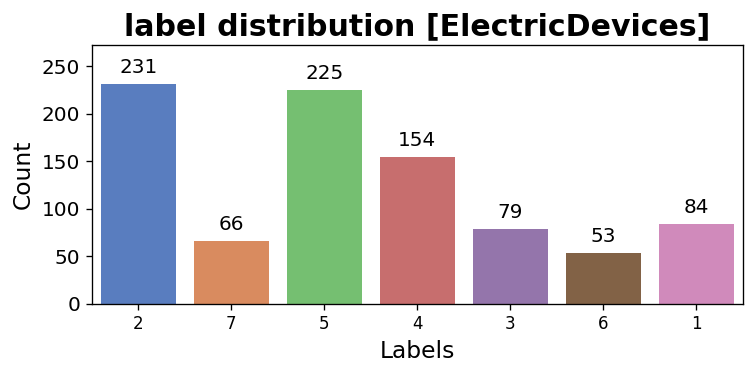

In [8]:
# Classifier MR-Hydra, Dataset ED 10%
current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)
x_t, y_t = dataset_overview(train_test_dct=current_ds["y_train_small"] , dataset_name=DATASET_NAME)
current_cl = BakeoffClassifier(name=CLASSIFIER_NAME, random_state=RANDOM_S)
cl_dict = {CLASSIFIER_NAME: current_cl}
df_,  trace_m_= apply_label_errors(train_test_df=current_ds, cl_dict=cl_dict, ds_=DATASET_NAME, doe_param=DoE_PARAM)

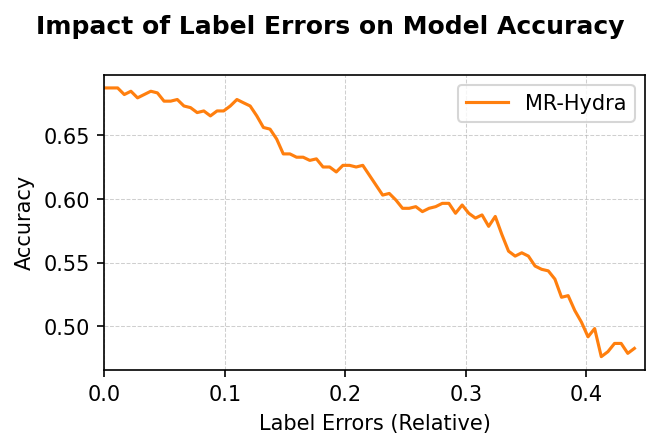

In [6]:
visualize_acc_decr(df_acc_inst_rel=df_, dpi_=150, first="relative", second=None, w_=4.5, h_=3, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, save_fig=True)

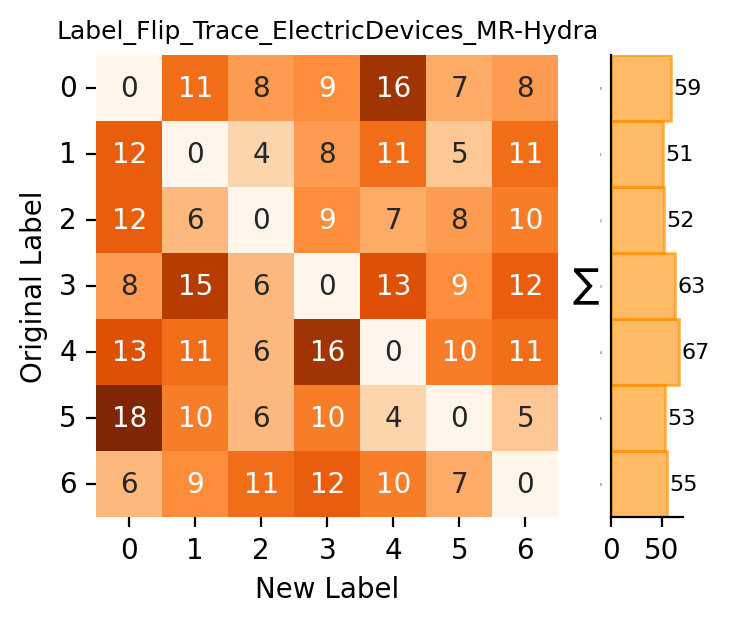

In [7]:
visualize_trace_M(trace_M=trace_m_, cl_=CLASSIFIER_NAME, ds_=DATASET_NAME, dpi=200, filename_="trace_M", save_fig=True)

In [ ]:
DATASET_NAME = "ElectricDevices"        #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 10                        #optional. only for large datasets
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"le_strategy":"leV1","random_seed":1,"start":0,"stop":550,"step":5}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True  


current_ds, current_meta = dataset_provider(name=DATASET_NAME, reduction_factor=REDUCTION_F, test_set_ratio="default_benchmark", random_state=0)

X_train             : (8926, 1, 96)
y_train             : (8926,)
X_test              : (7711, 1, 96)
y_test              : (7711,)
X_train_small       : (892, 1, 96)
y_train_small       : (892,)
X_test_small        : (771, 1, 96)
y_test_small        : (771,)
